In [1]:
import numpy as np
import pandas as pd
import pomegranate as pq
import scipy.stats as stats
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
m = pq.DiscreteDistribution({'Aubrey': 0.7, 'Grey': 0.3})
w = pq.ConditionalProbabilityTable(
    [
        ['Aubrey', 'Knife', 0.8],
        ['Aubrey', 'Gun', 0.2],
        ['Grey', 'Knife', 0.1],
        ['Grey', 'Gun', 0.9]
    ],
    [m]
)
h = pq.ConditionalProbabilityTable(
    [
        ['Aubrey', 'Hair', 0.05],
        ['Aubrey', 'No hair', 0.95],
        ['Grey', 'Hair', 0.50],
        ['Grey', 'No hair', 0.50],
    ], [m]
)

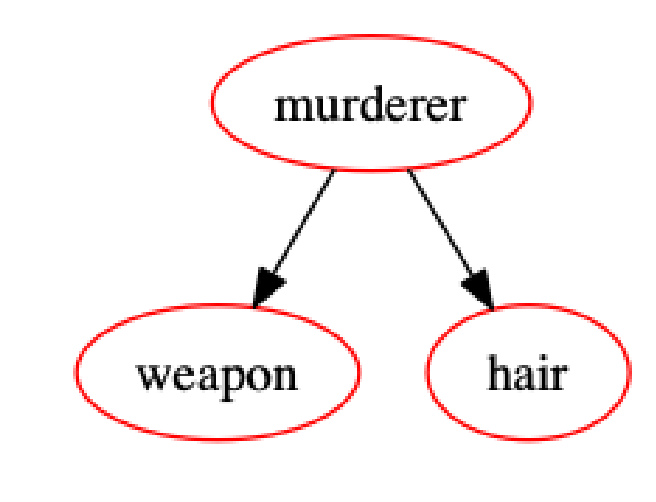

In [3]:
s1 = pq.State(m, name="murderer")
s2 = pq.State(w, name='weapon')
s3 = pq.State(h, name='hair')

network = pq.BayesianNetwork("Murder")
network.add_states(s1, s2, s3)
network.add_edge(s1, s2)
network.add_edge(s1, s3)
network.bake()
network.plot()

In [4]:
def marginals(network):
    return list(map(lambda e: e.parameters[0], network.marginal()))

marginals(network)

[{'Aubrey': 0.69999999999999962, 'Grey': 0.30000000000000043},
 {'Gun': 0.4100000000000002, 'Knife': 0.58999999999999975},
 {'Hair': 0.18500000000000022, 'No hair': 0.81499999999999972}]

In [5]:
r = network.predict_proba()
r2 = network.predict_proba({'weapon': 'Gun'})
r3 = network.predict_proba({'weapon': 'Gun', 'hair': 'Hair'})

results = [
    r[0].parameters[0],
    r2[0].parameters[0],
    r3[0].parameters[0]
]

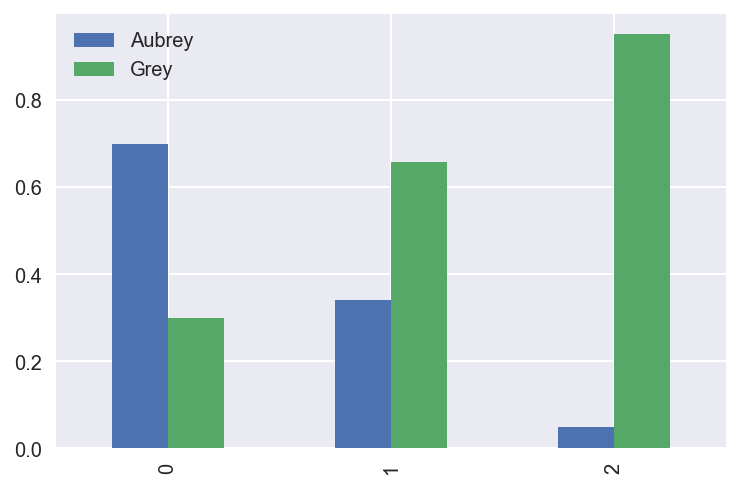

In [6]:
pd.DataFrame(results).plot.bar()